In [11]:
# A1
import pandas as pd
import numpy as np      
def load_excel():
    columns=['Customer','Candies (#)','Mangoes (Kg)', 'Milk Packets (#)','Payment (Rs)']
    df = pd.read_excel("C:\\Users\\everybody\\Amrita University\\sem 5\\Machine learning\\Lab Session Data.xlsx",usecols=columns)
    return df
 
def convert_to_matrices(df):
    df_numerical = df.select_dtypes(include='number')
    df1 = df_numerical[['Candies (#)','Mangoes (Kg)','Milk Packets (#)']]
    df2 = df_numerical[['Payment (Rs)']]
    m1 = df1.values
    m2 = df2.values
    return m1,m2

def dimensionality(matrix):
    return matrix.shape[1]
    
def rank(matrix):
    return np.linalg.matrix_rank(matrix)

def finding_variables(matrix1,matrix2):
    matrix_inv = np.linalg.pinv(matrix1)
    return np.dot(matrix_inv,matrix2)


In [13]:
# A1
def main():
    # loading excel sheet into notebook
    df = load_excel()
    print(df.head())
    # generating the matrices
    A,C = convert_to_matrices(df)
    #finding dimensionality of the matrix
    dimension = dimensionality(A)
    print(f"The dimensionality of the vector space is {dimension}")
    #finding the rank of the matrix
    A_rank = rank(A)
    print(f"The rank of Matrix A is {A_rank}")
    # finding the values of the variables
    variable_matrix = finding_variables(A,C)
    print(f"The values of the first second and third variables are:{variable_matrix[0]},{variable_matrix[1]},{variable_matrix[2]}")

if __name__ == "__main__":
    main()

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
The dimensionality of the vector space is 3
The rank of Matrix A is 3
The values of the first second and third variables are:[1.],[55.],[18.]


In [15]:
#A3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# classifying as rich or poor
def classifying(df):
    df['Status'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
    return df
    
def train_evaluate_classifier(data, feature_columns, class_column):
    X = data[feature_columns]
    Y = data[class_column]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=37)
    model = LogisticRegression()
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)
    return accuracy, report

    
      




In [16]:
import pandas as pd
def main():
    df = load_excel()
    # classifying as rich or poor
    df = classifying(df)
    feature_columns = ['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']
    class_column = 'Status'
    accuracy, report = train_evaluate_classifier(df, feature_columns, class_column)
    print(f"accuracy: {accuracy}, report: {report}")
    
if __name__ == "__main__":
    main()

accuracy: 0.8, report:               precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5



In [31]:
#A4
import pandas as pd
import statistics
def load_excel(filepath,columns,sheetindex):
    df = pd.read_excel(filepath,usecols=columns,sheet_name=sheetindex)
    return df
def mean(df):
    return statistics.mean(df['Price'])

def variance(df):
    return df['Price'].var()
def sample_mean_day(df):
    mean = df[df['Day'] == 'Wed']['Price'].mean()
    return mean
def sample_mean_month(df):
    return df[df['Month'] == 'Apr']['Price'].mean()
def prob_loss(df):
    df['losses'] = df['Chg%'].apply(lambda x: 1 if x < 0 else 0)
    return df['losses'].mean()
def wed_prob_profit(df):
    df['profit'] = df[df['Day'] == 'Wed']['Chg%'].apply(lambda x: 1 if x > 0 else 0)
    return df['profit'].mean()
def conditional_prob(df):
    df['Date'] = pd.to_datetime(df['Date'])
    is_wednesday = df['Date'].dt.day_name() == 'Wednesday'
    is_profit = df['Chg%'] > 0
    profitable_wednesdays = df[is_wednesday & is_profit].shape[0]
    total_wednesdays = df[is_wednesday].shape[0]
    conditional_probability = profitable_wednesdays / total_wednesdays if total_wednesdays > 0 else 0
    return conditional_probability
def scatter(df):
    df.plot(x='Day', y='Chg%', kind='scatter')

    
    
    

           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  
The mean of the price column is 1560.663453815261
The variance of the price column is 58732.36535253922
The sample mean on wednesdays is 1550.7060000000001
The sample mean in the month of April is 1698.9526315789474
The probability of a loss is 0.4979919678714859
The probability of making a profit on wednesdays is 0.42
The conditional probability is 0.42


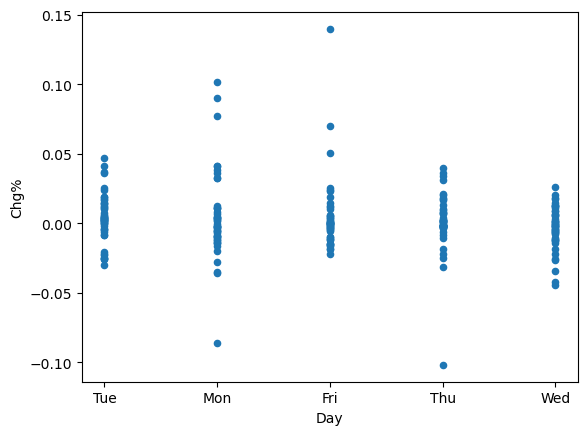

In [33]:
def main():
    filepath = "C:\\Users\\everybody\\Amrita University\\sem 5\\Machine learning\\Lab Session Data.xlsx"
    cols = ['Date','Month','Day','Price','Open','High','Low','Volume','Chg%']
    df = load_excel(filepath,cols,1)
    print(df.head())
    # finding the mean
    print(f"The mean of the price column is {mean(df)}")
    #finding the variance of the price column
    print(f"The variance of the price column is {variance(df)}")

    # finding the mean for columns for price where the day is wednesday
    print(f"The sample mean on wednesdays is {sample_mean_day(df)}")

    #finding the sample mean for price columns whose month is April
    print(f"The sample mean in the month of April is {sample_mean_month(df)}")

    #finding the probability of loss
    print(f"The probability of a loss is {prob_loss(df)}")
    # finding the probaility of making a profit on wednesdays
    print(f"The probability of making a profit on wednesdays is {wed_prob_profit(df)}")
    # the conditional probability of making a profit given the fact its a wednesday
    print(f"The conditional probability is {conditional_prob(df)}")

    # scatter plot
    scatter(df)
    
    
    
    

if __name__ == "__main__":
    main()